## Description:
#### This program uses an artifitical recurrent neural network called Long Short Term Memory (LSTM) . This will be used to predict the closing stock price of a corporation (Netflix) using the past 60 days stock price.

In [1]:
## Import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
## Load the data
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-12,351.820007,353.609985,343.230011,345.559998,345.559998,4584700
1,2019-06-13,347.230011,348.500000,339.250000,343.429993,343.429993,6209300
2,2019-06-14,341.630005,343.399994,336.160004,339.730011,339.730011,5019000
3,2019-06-17,342.690002,351.769989,342.059998,350.619995,350.619995,5358200
4,2019-06-18,355.570007,361.500000,353.750000,357.119995,357.119995,5428500
5,2019-06-19,361.720001,364.739990,356.119995,363.519989,363.519989,5667200


In [3]:
## Get the number of trading days.
df.shape
## There are 252-254 trading days in an year. So, here I have an year's worth of data.

(254, 7)

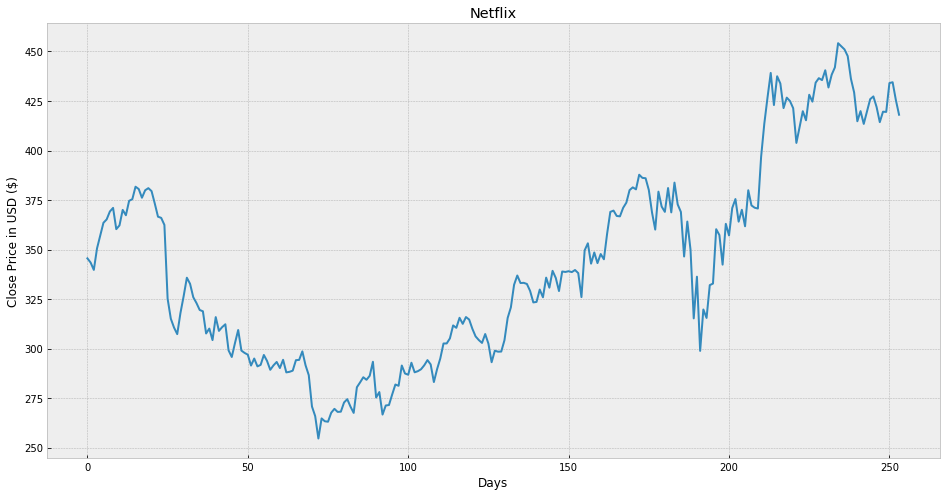

In [4]:
## Vizualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(df['Close'])
plt.show()

In [5]:
## The above plot gives us a rough idea of what the prices look like over an year. 
## Now let us get the close price 

df = df[['Close']]
df.head(4)

,Close
0,345.559998
1,343.429993
2,339.730011
3,350.619995


In [7]:
## Create a variable to predict the 'x' days out into the future
future_days = 25
## Create a new column (target) shifted 'x' days up
df['Prediction'] = df[['Close']].shift(-future_days) 
#df.head(4)
#df.tail(4)

,Close,Prediction
250,434.049988,NaN
251,434.480011,NaN
252,425.559998,NaN
253,418.070007,NaN


In [8]:
## Create the feature datset (X) and convert it to numpy array and remove the last 'x' rows/days

X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[345.559998]
 [343.429993]
 [339.730011]
 [350.619995]
 [357.119995]
 [363.519989]
 [365.209991]
 [369.209991]
 [371.040009]
 [360.299988]
 [362.200012]
 [370.019989]
 [367.320007]
 [374.600006]
 [375.429993]
 [381.720001]
 [380.549988]
 [376.160004]
 [379.929993]
 [381.      ]
 [379.5     ]
 [373.25    ]
 [366.600006]
 [365.98999 ]
 [362.440002]
 [325.209991]
 [315.100006]
 [310.619995]
 [307.299988]
 [317.940002]
 [326.459991]
 [335.779999]
 [332.700012]
 [325.929993]
 [322.98999 ]
 [319.5     ]
 [318.829987]
 [307.630005]
 [310.100006]
 [304.290009]
 [315.899994]
 [308.929993]
 [310.829987]
 [312.279999]
 [299.109985]
 [295.76001 ]
 [302.799988]
 [309.380005]
 [298.98999 ]
 [297.809998]
 [296.929993]
 [291.440002]
 [294.980011]
 [291.029999]
 [291.769989]
 [296.779999]
 [293.75    ]
 [289.290009]
 [291.519989]
 [293.25    ]
 [290.170013]
 [294.339996]
 [287.98999 ]
 [288.269989]
 [288.859985]
 [294.149994]
 [294.290009]
 [298.600006]
 [291.559998]
 [286.600006]
 [270.75    ]
 [265.

In [9]:
## Create the target dataset (Y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[325.209991 315.100006 310.619995 307.299988 317.940002 326.459991
 335.779999 332.700012 325.929993 322.98999  319.5      318.829987
 307.630005 310.100006 304.290009 315.899994 308.929993 310.829987
 312.279999 299.109985 295.76001  302.799988 309.380005 298.98999
 297.809998 296.929993 291.440002 294.980011 291.029999 291.769989
 296.779999 293.75     289.290009 291.519989 293.25     290.170013
 294.339996 287.98999  288.269989 288.859985 294.149994 294.290009
 298.600006 291.559998 286.600006 270.75     265.920013 254.589996
 264.75     263.309998 263.079987 267.619995 269.579987 268.029999
 268.149994 272.790009 274.459991 270.720001 267.529999 280.480011
 282.929993 285.529999 284.25     286.279999 293.350006 275.299988
 278.049988 266.690002 271.269989 271.5      276.820007 281.859985
 281.209991 291.450012 287.410004 286.809998 292.859985 288.029999
 288.589996 289.570007 291.570007 294.179993 292.01001  283.109985
 289.619995 295.029999 302.570007 302.600006 305.160004 311.690

In [10]:
## Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [12]:
## Create the models
## Create the decision tree regressor model

tree = DecisionTreeRegressor().fit(x_train, y_train)

## Create linera regression model
lr = LinearRegression().fit(x_train, y_train)

In [13]:
## Get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[370.079987],
       [361.76001 ],
       [379.959991],
       [372.279999],
       [371.119995],
       [370.720001],
       [396.720001],
       [413.549988],
       [426.75    ],
       [439.170013],
       [422.959991],
       [437.48999 ],
       [433.829987],
       [421.420013],
       [426.700012],
       [424.98999 ],
       [421.380005],
       [403.829987],
       [411.890015],
       [419.850006],
       [415.269989],
       [428.149994],
       [424.679993],
       [434.26001 ],
       [436.529999]])

In [14]:
## Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
## Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[435.549988 440.519989 431.820007 370.079987 441.950012 454.190002
 452.579987 451.040009 419.730011 414.769989 413.440002 414.769989
 419.890015 413.440002 419.730011 425.920013 413.440002 452.579987
 414.329987 419.600006 419.48999  419.730011 434.480011 425.559998
 418.070007]

[367.17272168 360.59289796 374.9862871  368.91259321 367.99520824
 367.67887443 388.24088039 401.55081473 411.98999647 421.81231882
 408.99268156 420.48367871 417.58917858 407.77479553 411.95046364
 410.59809893 407.74315535 393.8637871  400.23803108 406.53316117
 402.9110713  413.09717666 410.35293892 417.92926071 419.7244733 ]


C:\Users\utkar\Anaconda3\envs\Student\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


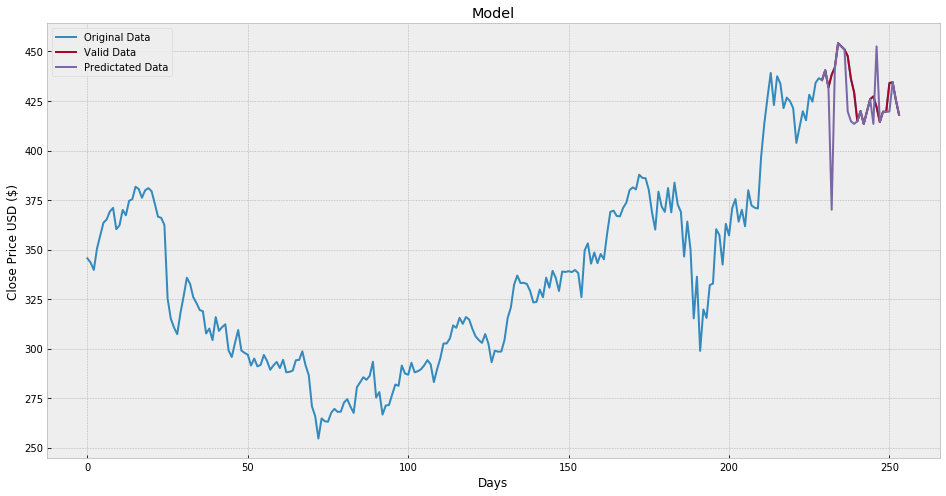

In [16]:
## Vizualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original Data', 'Valid Data', 'Predictated Data'])
plt.show() 

C:\Users\utkar\Anaconda3\envs\Student\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


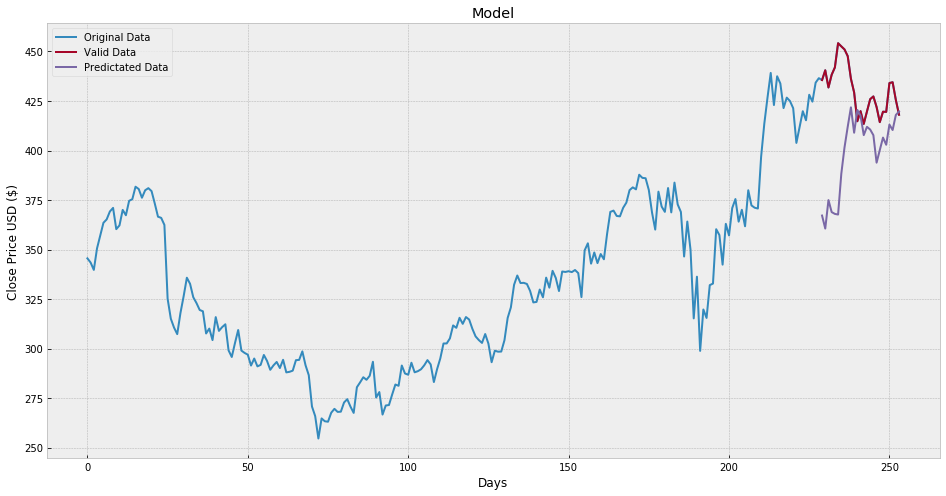

In [17]:
## Vizualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original Data', 'Valid Data', 'Predictated Data'])
plt.show()